![png](../../../imagenes/logotipo-axity-ppt.png)

# Principal Component Analysis (PCA)

## Explicación del Ejemplo

El propósito de este ejemplo es identificar a qué dígito corresponde una imagen. Se utilizará PCA, para reducir el número de características a utilizar.

### Los datos
Se utilizará el conjunto de datos load_digit de sklearn.  

El conjunto contiene imágenes de 8x8 pixeles, correspondientes a diferentes dígitos.  

In [1]:
# Importemos las librerias
import matplotlib.pyplot as plt

## Examinar los datos

In [2]:
# Importemos el conjunto de datos
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [4]:
digits.target[0]

0

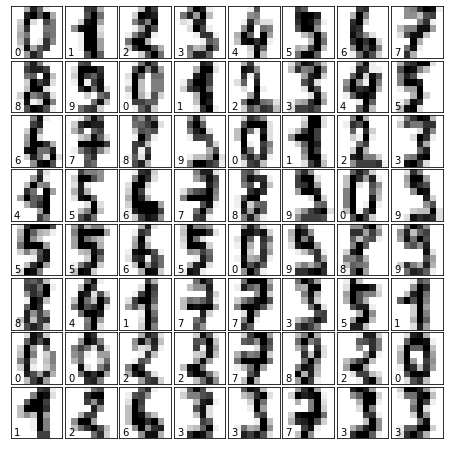

In [5]:
# Visualicemos los datos
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

## PCA

In [6]:
# Reducir la dimensión del dataset con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)

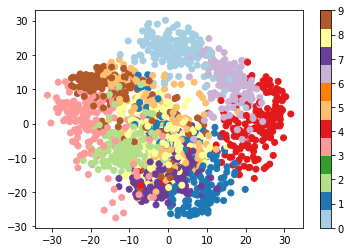

In [7]:
# Visualicemos una proyección de los 2 ejes principales
plt.figure()
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

## Entrenar el modelo

In [8]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [9]:
# Ajustar el modelo de naive Bayes en el Conjunto de Entrenamiento
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
# Predicción de los resultados con el Conjunto de Prueba
predicted = clf.predict(X_test)
expected = y_test

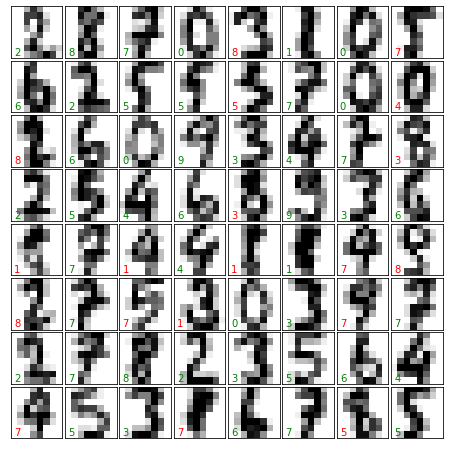

In [11]:
# Mostrar la predicción
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [12]:
# Verificar cuantas imágenes se identificaron correctamente
matches = (predicted == expected)
print(matches.sum())

369


In [13]:
# Número total de imágenes
print(len(matches))

450


In [14]:
# Proporción de imágenes identificadas correctamente
matches.sum() / float(len(matches))

0.82

In [15]:
# Elaborar una matriz de confusión
from sklearn import metrics
print(metrics.confusion_matrix(expected, predicted))
plt.show()

[[44  0  0  0  2  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  2  1  2]
 [ 0  6 30  1  0  0  0  0 10  0]
 [ 0  1  1 34  0  2  0  4  3  0]
 [ 1  2  0  0 43  0  0  4  1  0]
 [ 0  1  0  2  0 45  0  3  0  0]
 [ 0  0  0  0  0  1 45  0  0  0]
 [ 0  0  0  0  1  0  0 52  0  0]
 [ 0 11  0  3  0  1  0  4 23  0]
 [ 0  1  0  5  0  0  1  2  2 27]]


In [16]:
# Obtener el informe de clasificación
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.54      0.84      0.66        31
           2       0.97      0.64      0.77        47
           3       0.76      0.76      0.76        45
           4       0.93      0.84      0.89        51
           5       0.92      0.88      0.90        51
           6       0.98      0.98      0.98        46
           7       0.73      0.98      0.84        53
           8       0.57      0.55      0.56        42
           9       0.93      0.71      0.81        38

    accuracy                           0.82       450
   macro avg       0.83      0.81      0.81       450
weighted avg       0.84      0.82      0.82       450

